In [1]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
import seaborn as sns

df=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ishutenko/statistics/5_task_1.csv")
df_=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ishutenko/statistics/5_task_2.csv")
df_.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [38]:
stats.levene(df.query("group=='A'").events, df.query("group=='B'").events, df.query("group=='C'").events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [39]:
scipy.stats.f_oneway(df.query("group=='A'").events, df.query("group=='B'").events, df.query("group=='C'").events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [40]:
print(pairwise_tukeyhsd(df.events, df.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


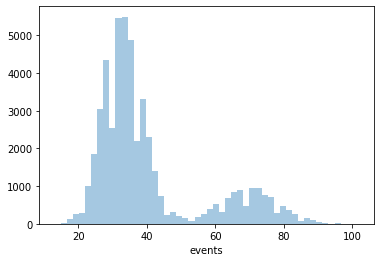

In [61]:
sns.distplot(df_.query("group=='test'").events, kde=False)


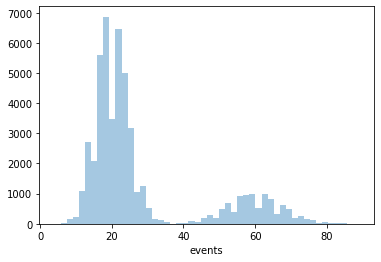

In [62]:
sns.distplot(df_.query("group=='control'").events, kde=False)

In [69]:
df_.groupby(['group','segment'],as_index=False).events.describe()

group          segment         count              mean             \
segment     high      low    high  low     high      low     high        low   
group                                                                          
control  control  control    high  low  10000.0  40000.0  59.9708  20.031575   
test        test     test    high  low  10000.0  40000.0  69.9385  33.025925   

              std             min         25%         50%         75%        \
segment      high       low  high   low  high   low  high   low  high   low   
group                                                                         
control  7.805347  4.473576  31.0   4.0  55.0  17.0  60.0  20.0  65.0  23.0   
test     8.403974  5.720845  40.0  13.0  64.0  29.0  70.0  33.0  76.0  37.0   

           max        
segment   high   low  
group                 
control   89.0  41.0  
test     102.0  59.0

In [71]:
df_.query("group=='control' and segment=='high'").events.describe()

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [95]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'events ~ group * segment'
model = ols(formula, df_).fit()
aov_table = anova_lm(model, typ=2)

In [96]:
aov_table

,sum_sq,df,F,PR(>F)
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group:segment,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [75]:
df_['combination'] = df_['group'] + '/' + df_['segment'] 

In [79]:
MultiComp = MultiComparison(df_.events, df_.combination)
print(MultiComp.tukeyhsd().summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


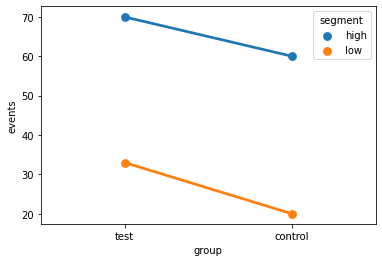

In [80]:
sns.pointplot(x='group', y='events', hue='segment', data=df_)

In [4]:
6/5*(0.5)

0.6

In [5]:
13 * 105


1365

In [41]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ishutenko/statistics/5_task_1.csv")
df_ = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ishutenko/statistics/5_task_2.csv")

In [7]:
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [12]:
df_

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [15]:
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [16]:
stats.levene(df.query('group == "A"').events, df.query('group == "B"').events, df.query('group == "C"').events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [19]:
stats.shapiro(df.query('group == "A"').events.sample(1000, random_state = 17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [20]:
stats.shapiro(df.query('group == "B"').events.sample(1000, random_state = 17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [21]:
stats.shapiro(df.query('group == "C"').events.sample(1000, random_state = 17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [25]:
stats.normaltest(df.query('group == "A"').events)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [26]:
stats.normaltest(df.query('group == "B"').events)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [27]:
stats.normaltest(df.query('group == "C"').events)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

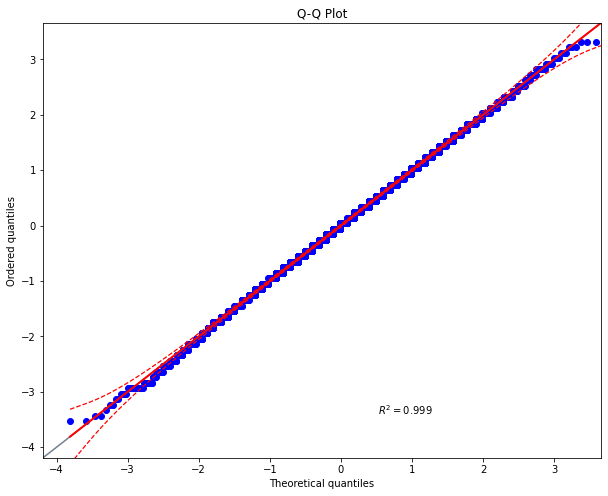

In [50]:
pg.qqplot(df.query('group == "A"').events, dist='norm', figsize=(10, 8))

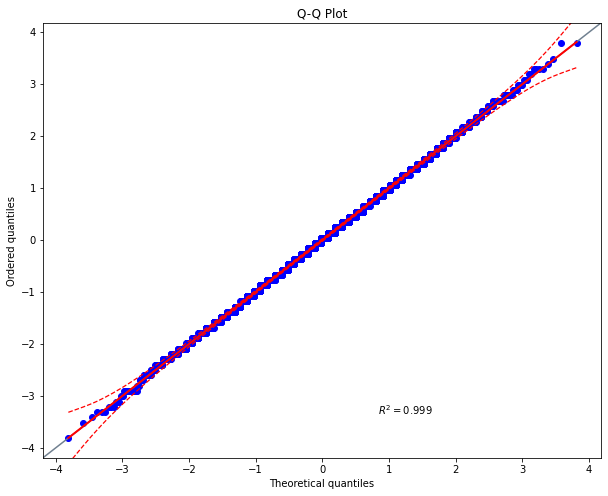

In [51]:
pg.qqplot(df.query('group == "B"').events, dist='norm', figsize=(10, 8))

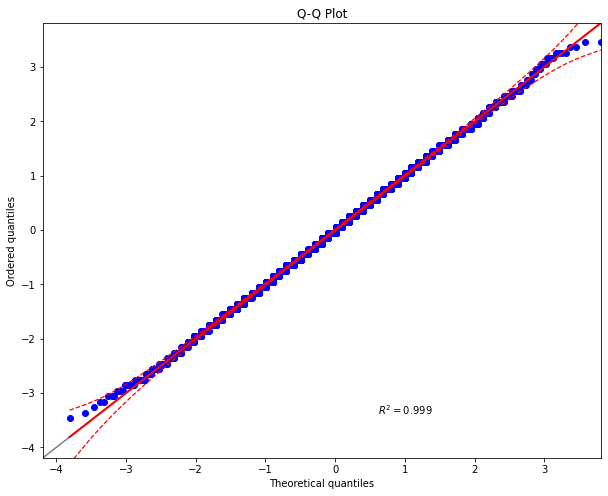

In [52]:
pg.qqplot(df.query('group == "C"').events, dist='norm', figsize=(10, 8))

In [54]:
pg.anova(data=df, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [55]:
pg.pairwise_tukey(data=df, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [59]:
pg.pairwise_gameshowell(data=df, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,0.001,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,0.001,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.001,1.024138


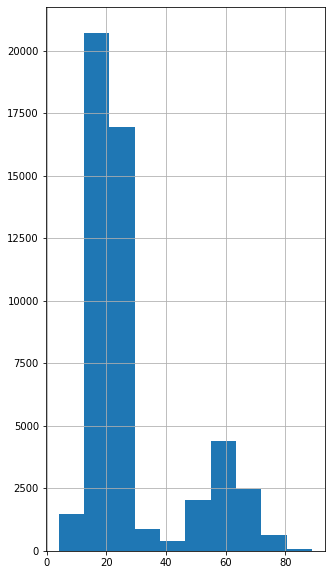

In [65]:
df_control = df_.query('group == "control"')
df_control

In [63]:
df_test = df_.query('group == "test"')
df_test

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
59995,92868,test,low,35.0
59996,63488,test,low,31.0
59997,3425,test,low,32.0
59998,53067,test,low,18.0


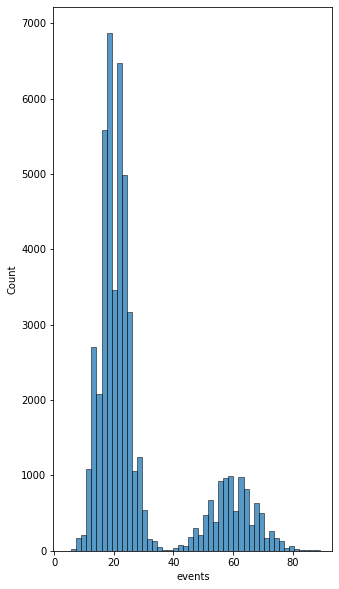

In [69]:
sns.histplot(data=df_control.events, bins=50)

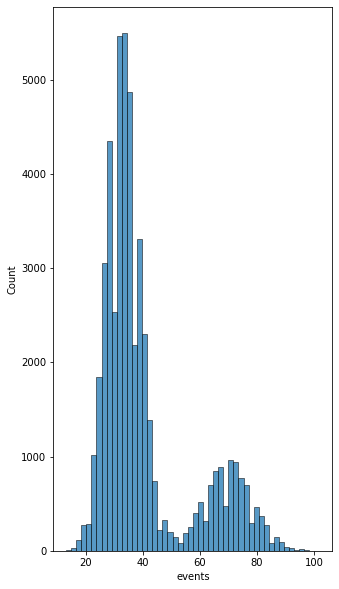

In [70]:
sns.histplot(data=df_test.events, bins=50)

In [81]:

df_.assign(std = df_.events).assign(mean = df_.events).groupby(['group', 'segment'], as_index=0).agg({'mean' : 'mean', 'std' : np.std})

,group,segment,mean,std
0,control,high,59.970800,7.805347
1,control,low,20.031575,4.473576
2,test,high,69.938500,8.403974
3,test,low,33.025925,5.720845


In [83]:
pg.anova(data=df_, dv='events', between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [85]:
df_['combination'] = df_.group + ' / ' + df_.segment

In [86]:
df_

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high
...,...,...,...,...,...
99995,60695,control,low,15.0,control / low
99996,5934,control,low,16.0,control / low
99997,30046,control,low,22.0,control / low
99998,26474,control,low,21.0,control / low


In [87]:
pg.pairwise_gameshowell(data=df_, dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.081195,491.891252,11689.025486,0.001,5.499429
1,control / high,test / high,59.970800,69.938500,-9.967700,0.114695,-86.905881,19889.784497,0.001,-1.228989
2,control / high,test / low,59.970800,33.025925,26.944875,0.083130,324.130575,12807.332699,0.001,3.623836
3,control / low,test / high,20.031575,69.938500,-49.906925,0.086966,-573.870317,11451.476175,0.001,-6.415969
4,control / low,test / low,20.031575,33.025925,-12.994350,0.036311,-357.857879,75603.667906,0.001,-2.530414
5,test / high,test / low,69.938500,33.025925,36.912575,0.088774,415.802398,12408.307593,0.001,4.648742


In [89]:
pg.pairwise_tukey(data=df_, dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


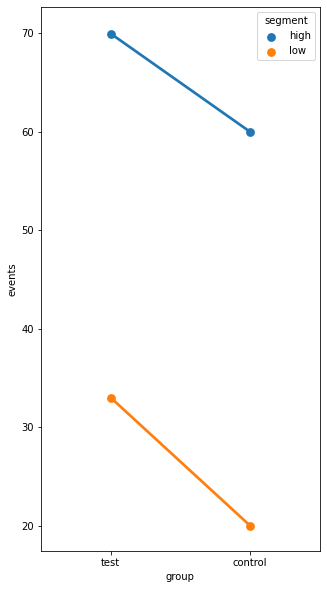

In [92]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df_)

In [90]:
df_

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high
...,...,...,...,...,...
99995,60695,control,low,15.0,control / low
99996,5934,control,low,16.0,control / low
99997,30046,control,low,22.0,control / low
99998,26474,control,low,21.0,control / low
